# Independent Samples T-Test

Test formula:

# $ t_{independent} = \frac{\overline{x}_1-\overline{x}_2} {SE_{\overline{x}_1-\overline{x}_2}} $

Subcomponents of test formula:

### $ SE_{\overline{x}_1 - \overline{x}_2} = \sqrt{\frac{S^2_p}{n_1} + \frac{S^2_p}{n_2}} $

$S^2_p = \frac{SS_1 + SS_2}{df_1 + df_2} $

Df: 998
Independent Samples T: -39.1695
P-value = 0.0

Scipy Independent T-value: -39.1695
p = 5.336274243072829e-204
The difference in the means between samples was signficantly different to that predicted by the null hypothesis.


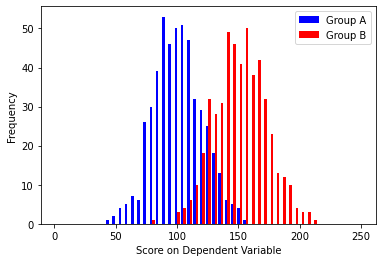

R-Squared =  0.61


In [1]:
# indpendent samples t test

import statistics as stats
import math
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

# generating the data. 1/2 probability that the samples are drawn from the sample population.

data1 = []
data2 = []

coin = ['Heads', 'Tails']

coin_toss = np.random.choice(coin)

if coin_toss == 'Heads':
    
    for i in range(500):
        data1.append(20*np.random.randn()+100)
        data2.append(20*np.random.randn()+150)
    
if coin_toss == 'Tails':
    for i in range(500):
        data1.append(20*np.random.randn()+100)
        data2.append(20*np.random.randn()+100)

# identifying sample size and degrees of freedom:

n_1 = len(data1)
df_1 = n_1 - 1

n_2 = len(data2)
df_2 = n_2 - 1

# calculating the mean and variance of each dataset:

mean_1 = stats.mean(data1)
mean_2 = stats.mean(data2)

# sum of squared deviations for dataset 1:


sq_dev_data1 = []
for i in np.arange(len(data1)):
    sq_dev_data1.append((data1[i]-mean_1)*(data1[i]-mean_1))
    
    
sum_sq_data1 = sum(sq_dev_data1)

# sum of squared deviations for dataset 2:

sq_dev_data2 = []
for i in np.arange(len(data2)):
    sq_dev_data2.append((data2[i]-mean_2)*(data2[i]-mean_2))
    
    
sum_sq_data2 = sum(sq_dev_data2)

# calculating the pooled variance:

pool_var = (sum_sq_data1+sum_sq_data2)/(df_1+df_2)

# calculating the standard error of the mean difference:

std_err_mean_diff = math.sqrt((pool_var/n_1)+(pool_var/n_2))

# calculating the test statistic:

mean_diff = mean_1 - mean_2

independent_t = mean_diff/std_err_mean_diff

print('Df:', df_1+df_2)
print('Independent Samples T:', round(independent_t, 4))
print('P-value =', 2 * (1 - scipy.stats.t.cdf(x = abs(independent_t), df = (df_1+df_2))))

# checking results, and obtaining p-value, with scipy:

scipy_ind_t = scipy.stats.ttest_ind(data1, data2)

print('\nScipy Independent T-value:', round(scipy_ind_t[0],4))
print('p =', scipy_ind_t[1])

if scipy_ind_t[1] <= 0.05:
    print('The difference in the means between samples was signficantly different to that predicted by the null hypothesis.')
else:
    print('The difference in the means between samples was NOT signficantly different to that predicted by the null hypothesis')
    
# creating a histogram for the data

bins = np.linspace(1,250)

plt.hist([data1,data2], bins, color = ['blue', 'red'], label = ['Group A', 'Group B'])

plt.xlabel("Score on Dependent Variable")

plt.ylabel("Frequency")

plt.legend(loc='upper right')

plt.show()

# calculating effect size

r_squared = independent_t**2/(independent_t**2 +(df_1+df_2))

print('R-Squared = ', round(r_squared,2))